In [22]:
import os
import csv
import pandas as pd
import plotly.express as px
import sklearn
import matplotlib.pyplot as plt

EARTHQUAKE_PATH = "datasets/earthquakes.csv"
MAPBOX_ACCESS_KEY = "pk.eyJ1IjoibWFya21pbmtvZmYiLCJhIjoiY2tmcGxuOHBrMDBxNTJwb2VmMXFxOG0wMCJ9.pvvC0x4DbywnR3_mfi-3hw"

# READ EARTHQUAKE CSV FILE
def load_earthquake_data(earthquake_path = EARTHQUAKE_PATH):
    return pd.read_csv(earthquake_path)

# IMPORT DATA AS PANDAS DATAFRAME
df = load_earthquake_data()

In [23]:
# RAW DATAFRAME INFO
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23412 entries, 0 to 23411
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Date                        23412 non-null  object 
 1   Time                        23412 non-null  object 
 2   Latitude                    23412 non-null  float64
 3   Longitude                   23412 non-null  float64
 4   Type                        23412 non-null  object 
 5   Depth                       23412 non-null  float64
 6   Depth Error                 4461 non-null   float64
 7   Depth Seismic Stations      7097 non-null   float64
 8   Magnitude                   23412 non-null  float64
 9   Magnitude Type              23409 non-null  object 
 10  Magnitude Error             327 non-null    float64
 11  Magnitude Seismic Stations  2564 non-null   float64
 12  Azimuthal Gap               7299 non-null   float64
 13  Horizontal Distance         160

In [24]:
### DATA CLEANING ###
# Machine learning algorithms do not function appropriately with missing values.

# 1) Dropping columns with many missing feautres.
incomplete_features=['Depth Error', 'Depth Seismic Stations', 'Magnitude Error', 'Magnitude Seismic Stations', 
                    'Azimuthal Gap', 'Horizontal Distance', 'Horizontal Error', 'Root Mean Square']
df.drop(incomplete_features, axis=1, inplace=True)

# 2) Dropping rows where magnitude type is missing.
df.dropna(axis=0, how='any', inplace=True)

df.info()

# Data reduction by approx. 33%

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23409 entries, 0 to 23411
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              23409 non-null  object 
 1   Time              23409 non-null  object 
 2   Latitude          23409 non-null  float64
 3   Longitude         23409 non-null  float64
 4   Type              23409 non-null  object 
 5   Depth             23409 non-null  float64
 6   Magnitude         23409 non-null  float64
 7   Magnitude Type    23409 non-null  object 
 8   ID                23409 non-null  object 
 9   Source            23409 non-null  object 
 10  Location Source   23409 non-null  object 
 11  Magnitude Source  23409 non-null  object 
 12  Status            23409 non-null  object 
dtypes: float64(4), object(9)
memory usage: 2.5+ MB


In [25]:
from sklearn.preprocessing import OrdinalEncoder
### DATA TYPE CONVERSION ###

# Date Conversions
df['Date'] = pd.to_datetime(df['Date'], format = '%m/%d/%Y', errors = 'raise') 
df['Time'] = pd.to_datetime(df['Time'], format = '%H:%M:%S', errors = 'raise')
# Appending Year, Month, and Date column
df['Year'] = pd.DatetimeIndex(df['Date']).year
df['Month'] = pd.DatetimeIndex(df['Date']).month
df['Day'] = pd.DatetimeIndex(df['Date']).day
#Appending Hour, Minute, and Second column
df['Hour'] = pd.DatetimeIndex(df['Time']).hour
df['Minute'] = pd.DatetimeIndex(df['Time']).minute
df['Second'] = pd.DatetimeIndex(df['Time']).second


ordinal_encoder = OrdinalEncoder()
df_type_encoded = ordinal_encoder.fit_transform(df[['Type']])
print(ordinal_encoder.categories_)

# Enumerating other lables
df['Type'] = pd.factorize(df['Type'], sort=False)[0]
df['Magnitude Type'] = pd.factorize(df['Magnitude Type'], sort=False)[0]
df['Location Source'] = pd.factorize(df['Location Source'], sort=False)[0]
df['Source'] = pd.factorize(df['Source'], sort=False)[0]
df['Magnitude Source'] = pd.factorize(df['Magnitude Source'], sort=False)[0]
df['Status'] = pd.factorize(df['Status'], sort=False)[0]

[array(['Earthquake', 'Explosion', 'Nuclear Explosion', 'Rock Burst'],
      dtype=object)]


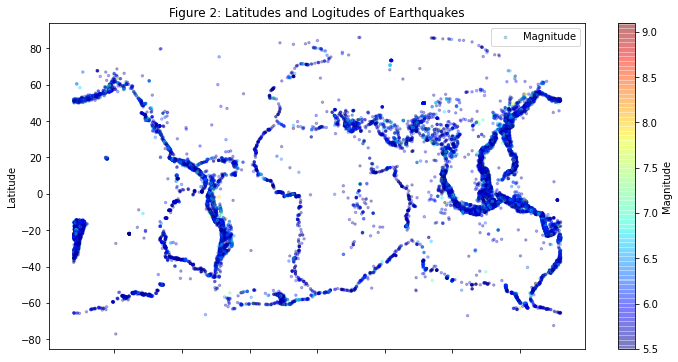

In [27]:
# Visualizing Geographical Data
df.plot(kind="scatter", x="Longitude", y="Latitude", alpha=0.3, figsize=(12,6), title="Figure 2: Latitudes and Logitudes of Earthquakes",
       s=df['Magnitude'], label='Magnitude', c='Magnitude', cmap=plt.get_cmap('jet'), colorbar=True,)
plt.legend()

# Display raw data on world map
px.set_mapbox_access_token(MAPBOX_ACCESS_KEY)
fig = px.scatter_mapbox(df, lat="Latitude", lon="Longitude", color="Magnitude", size="Magnitude",
                  color_continuous_scale=px.colors.cyclical.IceFire, size_max=5, zoom=0, title="Figure 1: Significant Earthquakes from 1965 to 2016")
fig.show()

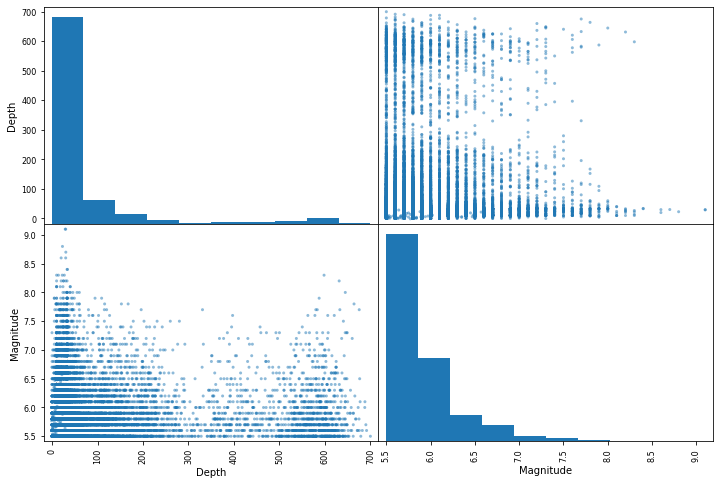

In [28]:
from pandas.plotting import scatter_matrix

# Looking for Correlations
attributes = ['Depth', 'Magnitude']
scatter_matrix(df[attributes], figsize=(12, 8))
corr_matrix = df.corr()

In [29]:
# Correlations of Depth vs other data labels
corr_matrix["Depth"].sort_values(ascending=False)

# There appears to be no significant correlation between 'Depth' and other data labels

Depth               1.000000
Magnitude Source    0.028205
Magnitude           0.023432
Hour                0.010331
Day                 0.008504
Status              0.003672
Month               0.001798
Source              0.001267
Minute             -0.001541
Second             -0.012726
Magnitude Type     -0.014987
Year               -0.024041
Location Source    -0.028956
Type               -0.049577
Latitude           -0.080951
Longitude          -0.085953
Name: Depth, dtype: float64

In [30]:
# Correlations of Magnitude vs other data lables
corr_matrix["Magnitude"].sort_values(ascending=False)

# There appears to be no significant correlation between 'Magnitude' and other data labels

Magnitude           1.000000
Longitude           0.038514
Latitude            0.035055
Depth               0.023432
Hour                0.004522
Minute              0.002819
Month               0.001162
Day                -0.002026
Type               -0.005356
Second             -0.007301
Magnitude Type     -0.027327
Year               -0.032045
Location Source    -0.043119
Magnitude Source   -0.083131
Status             -0.103903
Source             -0.105835
Name: Magnitude, dtype: float64

In [31]:
### Splitting Training and Testing Data ###
from sklearn.model_selection import train_test_split

# Random sampling method
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)
input_labels = ['Type', 'Depth', 'Magnitude', 'Magnitude Type', 'Source', 'Location Source', 'Magnitude Source', 'Status', 'Year', 'Month',
                    'Day', 'Hour', 'Minute', 'Second']
output_labels = ['Latitude', 'Longitude']
x_train = train_set[input_labels].copy()
y_train = train_set[output_labels].copy()
x_valid = test_set[input_labels].copy()
y_valid = test_set[output_labels].copy()

In [32]:
import tensorflow as tf
from tensorflow import keras

model = keras.models.Sequential([
    keras.layers.InputLayer(input_shape=(14,)),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(2, activation="tanh")
])

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning:

Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning:

Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning:

Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\tensorflow\python\framework\dtypes.py:5

Instructions for updating:
Colocations handled automatically by placer.


In [49]:
model.compile(loss='mean_squared_error',
             optimizer='sgd',
             metrics=['accuracy'])

In [50]:
history = model.fit(x_train, y_train, epochs=1000,
                   validation_data=(x_valid, y_valid))

Train on 18727 samples, validate on 4682 samples
Epoch 1/1000
18727/18727 [==============================] - 1s 64us/sample - loss: 9161.0640 - acc: 0.3568 - val_loss: 9151.4832 - val_acc: 0.3584
Epoch 2/1000
18727/18727 [==============================] - 1s 53us/sample - loss: 9161.1334 - acc: 0.3565 - val_loss: 9151.4832 - val_acc: 0.3584
Epoch 3/1000
18727/18727 [==============================] - 1s 52us/sample - loss: 9161.1334 - acc: 0.3565 - val_loss: 9151.4832 - val_acc: 0.3584
Epoch 4/1000
18727/18727 [==============================] - 1s 52us/sample - loss: 9161.1335 - acc: 0.3565 - val_loss: 9151.4831 - val_acc: 0.3584
Epoch 5/1000
18727/18727 [==============================] - 1s 52us/sample - loss: 9161.1334 - acc: 0.3565 - val_loss: 9151.4832 - val_acc: 0.3584
Epoch 6/1000
18727/18727 [==============================] - 1s 52us/sample - loss: 9161.1335 - acc: 0.3565 - val_loss: 9151.4832 - val_acc: 0.3584
Epoch 7/1000
18727/18727 [==============================] - 1s 65us/s

KeyboardInterrupt: 

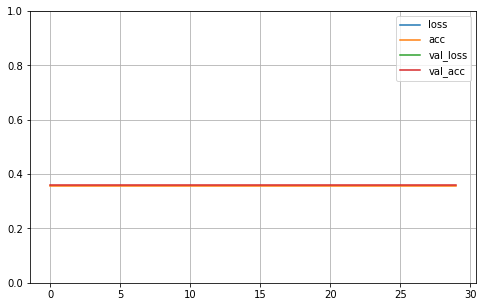

In [43]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()